In [31]:
import cv2
from skimage.feature import hog
from skimage import exposure
import joblib
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

SVM_Linear_model_HOG = joblib.load('SVM_Linear_model_HOG.pkl')
SVM_RBF_model_HOG = joblib.load('SVM_RBF_HOG.pkl')
kNN_model_HOG = joblib.load('kNN_model_HOG.pkl')
RF_model_HOG = joblib.load('RF_model_HOG.pkl')

In [32]:
def Predict(img, model):
    img_GRAY = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_GRAY = cv2.resize(img_GRAY, (128, 128))

    hog_feature, hog_image = hog(img_GRAY, orientations=9, pixels_per_cell=(16, 16),
                                 cells_per_block=(3, 3), block_norm='L2-Hys', visualize=True)

    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    hog_feature = hog_feature.reshape(1, -1)

    if model == 'SVM_Linear_model_HOG':
        y_pred = SVM_Linear_model_HOG.predict(hog_feature)
    elif model == 'SVM_RBF_model_HOG':
        y_pred = SVM_RBF_model_HOG.predict(hog_feature)
    elif model == 'kNN_model_HOG':
        y_pred = kNN_model_HOG.predict(hog_feature)
    elif model == 'RF_model_HOG':
        y_pred = RF_model_HOG.predict(hog_feature)
    
    return y_pred[0], hog_image

In [33]:
root_path = 'D:\\CS231\\Final_Project'
root_list = os.listdir(root_path)
test_path = os.path.join(root_path, 'test')

In [34]:
X_test = []
y_test = []

In [35]:
for index, image_dir in enumerate(os.listdir(test_path)):
    label = index
    image_dir_path = os.path.join(test_path, image_dir)  
    image_paths = glob.glob(os.path.join(image_dir_path, "*.jpg"))
    
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image,(128,128))
            
            
            X_test.append(image)
            y_test.append(label)

In [36]:
correct_predictions = []
incorrect_predictions = []

for image, label in zip(X_test, y_test):
    predictions = {}
    for model_name in ['SVM_Linear_model_HOG', 'SVM_RBF_model_HOG', 'kNN_model_HOG', 'RF_model_HOG']:
        y_pred, hog_image = Predict(image, model_name)
        predictions[model_name] = y_pred

    if all(pred == label for pred in predictions.values()):
        correct_predictions.append((image, label, predictions))
    else:
        incorrect_predictions.append((image, label, predictions))

In [37]:
def display_images(image_list, title, num_cols=5):
    num_images = len(image_list)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(15, num_rows * 3))
    for idx, (image, label, predictions) in enumerate(image_list[:]):
        plt.subplot(num_rows, num_cols, idx + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Label: {label}\n"
                  f"SVM_Linear: {predictions['SVM_Linear_model_HOG']}\n"
                  f"SVM_RBF: {predictions['SVM_RBF_model_HOG']}\n"
                  f"kNN: {predictions['kNN_model_HOG']}\n"
                  f"RF: {predictions['RF_model_HOG']}")
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Correct Predictions:


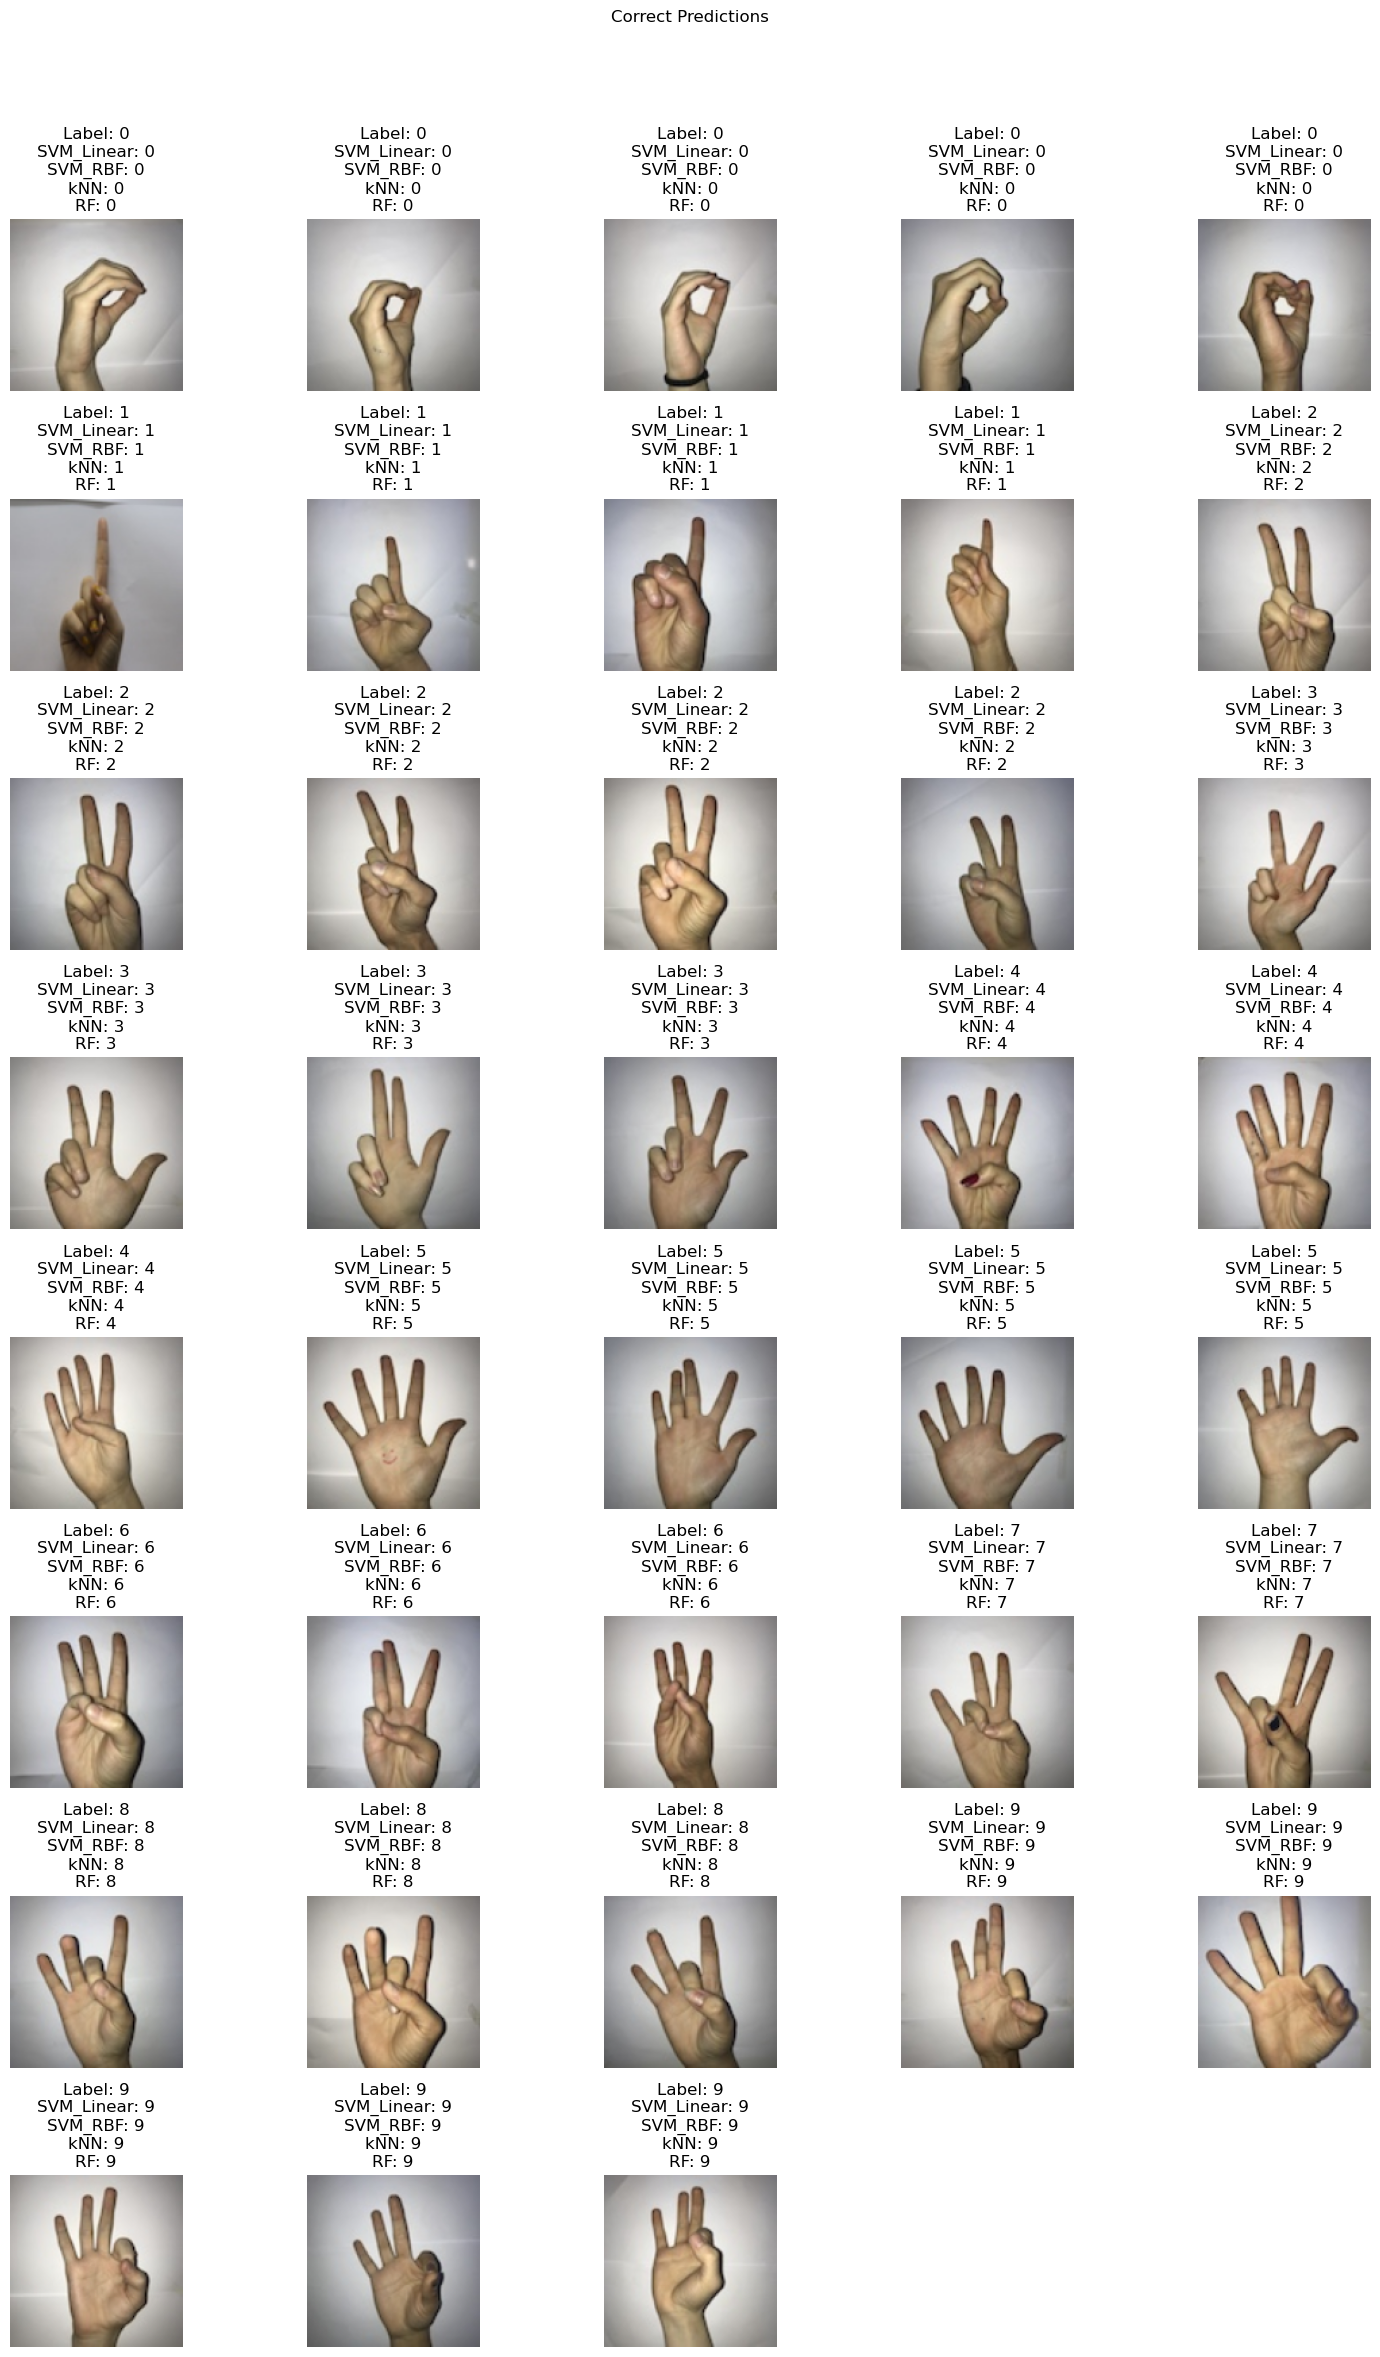

In [38]:
print("Correct Predictions:")
display_images(correct_predictions, "Correct Predictions")

Incorrect Predictions:


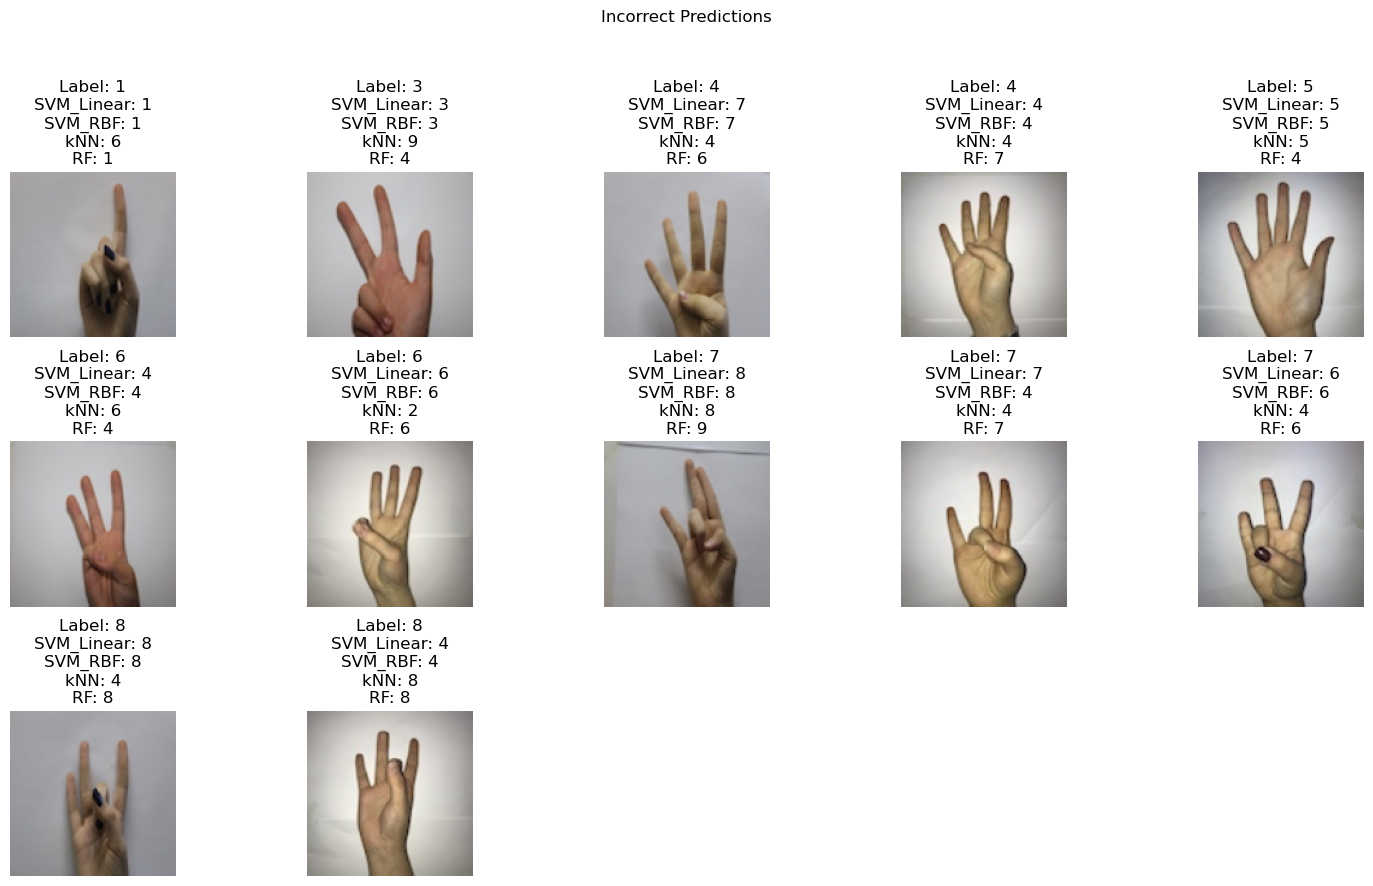

In [39]:
print("Incorrect Predictions:")
display_images(incorrect_predictions, "Incorrect Predictions")

In [60]:
root_path = 'D:\\CS231\\Final_Project'
root_list = os.listdir(root_path)
test_path = os.path.join(root_path, 'real_test')
X_test = []
y_test = []

for index, image_dir in enumerate(os.listdir(test_path)):
    label = index
    image_dir_path = os.path.join(test_path, image_dir) 
    image_paths = glob.glob(os.path.join(image_dir_path, "*.jpg")) 
    
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image,(128,128))
            
            
            X_test.append(image)
            y_test.append(label)
correct_predictions = []
incorrect_predictions = []

for image, label in zip(X_test, y_test):
    predictions = {}
    for model_name in ['SVM_Linear_model_HOG', 'SVM_RBF_model_HOG', 'kNN_model_HOG', 'RF_model_HOG']:
        y_pred, hog_image = Predict(image, model_name)
        predictions[model_name] = y_pred

    if all(pred == label for pred in predictions.values()):
        correct_predictions.append((image, label, predictions))
    else:
        incorrect_predictions.append((image, label, predictions))

Correct Predictions:


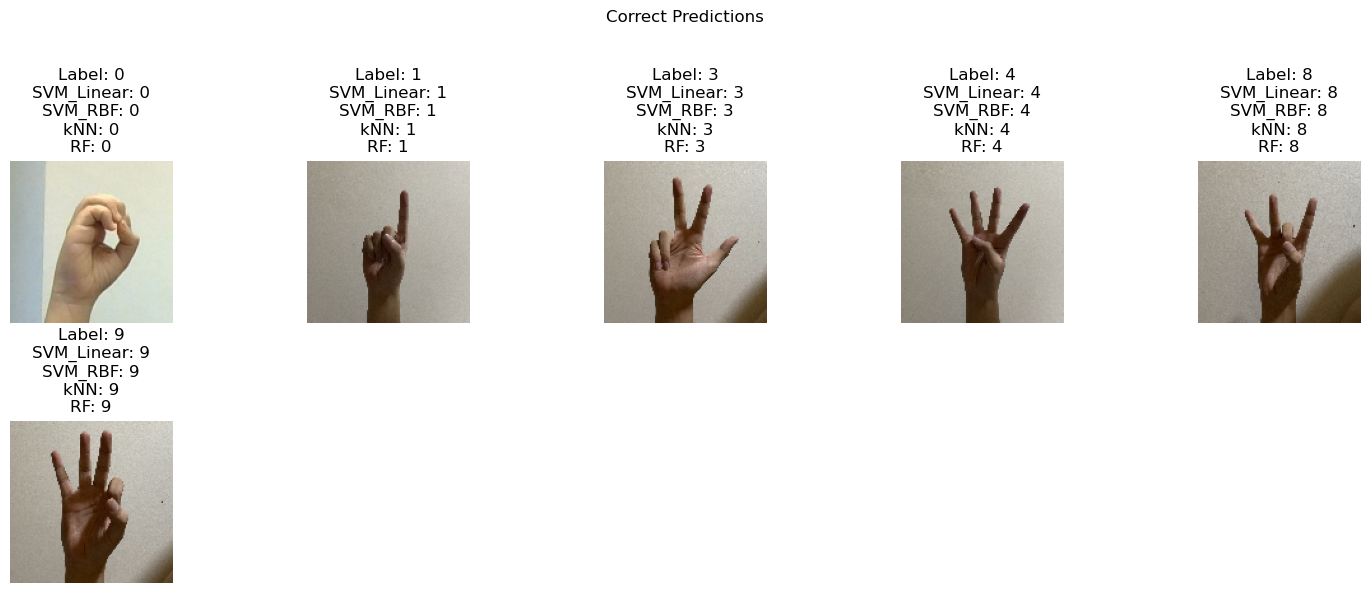

In [61]:
print("Correct Predictions:")
display_images(correct_predictions, "Correct Predictions")

Incorrect Predictions:


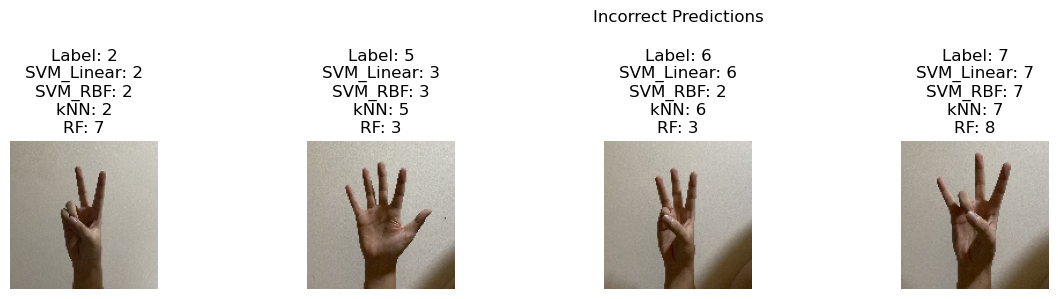

In [62]:
print("Incorrect Predictions:")
display_images(incorrect_predictions, "Incorrect Predictions")

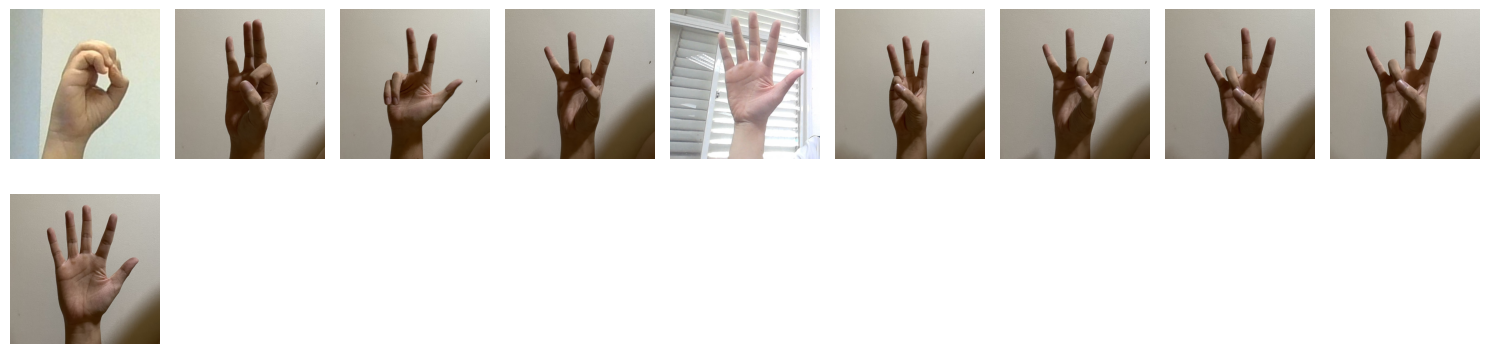

Phone Number : 0938568775
SVM_Linear_model_HOG: 0938368775
SVM_RBF_model_HOG: 0938368775
kNN_model_HOG: 0638368775
RF_model_HOG: 0935938775


In [70]:
import random

def display_images(image_list, num_cols=9):
    num_images = len(image_list)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(15, num_rows * 2))
    for idx, image in enumerate(image_list):
        plt.subplot(num_rows, num_cols, idx + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

phone_number = "0395754815"

root_path = 'D:\\CS231\\Final_Project'
test_path = os.path.join(root_path, 'PhoneNumber')

selected_images = []
model_predictions = {'SVM_Linear_model_HOG': '', 'SVM_RBF_model_HOG': '', 'kNN_model_HOG': '', 'RF_model_HOG': ''}

for digit in phone_number:
    digit_path = os.path.join(test_path, digit)
    if os.path.exists(digit_path):
        image_paths = glob.glob(os.path.join(digit_path, "*.jpg"))
        if image_paths:
            selected_image_path = random.choice(image_paths)
            image = cv2.imread(selected_image_path)
            if image is not None:
                selected_images.append(image)
                for model_name in ['SVM_Linear_model_HOG', 'SVM_RBF_model_HOG', 'kNN_model_HOG', 'RF_model_HOG']:
                    y_pred, hog_image = Predict(image, model_name)
                    model_predictions[model_name] += str(y_pred)

display_images(selected_images)

print(f"Phone Number : {phone_number}")
for model_name, prediction in model_predictions.items():
    print(f"{model_name}: {prediction}")